In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('lyrics_01.csv')

In [3]:
# df.head()

# df.tail()

# df.describe()

# df.info()

In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9394 entries, 1 to 10219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9394 non-null   object 
 1   week        9394 non-null   object 
 2   standing    9394 non-null   float64
 3   artist      9394 non-null   object 
 4   title       9394 non-null   object 
 5   lyrics      9394 non-null   object 
dtypes: float64(1), object(5)
memory usage: 513.7+ KB


In [6]:
df.describe()

,standing
count,9394.000000
mean,50.076219
std,28.815325
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [7]:
# df.head()

# df.tail()

df.reset_index(inplace=True)

# df.tail()

df.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

# df.head()

In [8]:
def remove_specials_in_column(df, col_num):
    for idx, entry in enumerate(df.iloc[:,col_num]):
        df.iloc[idx, col_num] = remove_specials(df.iloc[idx, col_num])

In [9]:
def remove_specials(text):
    result = text.replace('\n', ' ')
    result = result.replace('\r', ' ')
    result = result.replace('\t', ' ')
    return result

In [10]:
remove_specials_in_column(df, 4)

In [11]:
df['character_count'] = 0
for idx, row in enumerate(df['lyrics']):
    df.iloc[idx, 5] = len(row)

In [12]:
df.head()

,week,standing,artist,title,lyrics,character_count
0,2020-05-02,2.0,Drake,Toosie Slide,"Black leather gloves, no sequins (Yeah, yeah, ...",2371
1,2020-05-02,3.0,Roddy Ricch,The Box,Pullin' out the coupe at the lot Told 'em fuc...,2689
2,2020-05-02,4.0,Dua Lipa,Don't Start Now,"If you don't wanna see me Did a full 180, cra...",1576
3,2020-05-02,5.0,Doja Cat,Say So,"Day and night til morning, keeping me in the m...",2203
4,2020-05-02,6.0,Post Malone,Circles,"Hey, hey, hey, hey Oh, oh, oh-oh Oh, oh, oh-...",1570


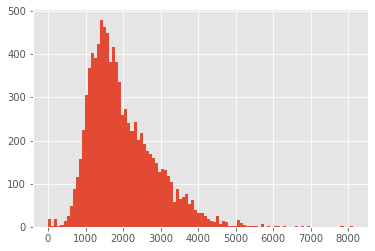

In [13]:
plt.hist(df['character_count'], bins=100);

In [15]:
min(df['character_count'])

8

In [17]:
df[df['character_count'] == 8]

,week,standing,artist,title,lyrics,character_count
7222,2001-08-25,92.0,Darude,Sandstorm,-techno-,8


In [18]:
df['word_count'] = 0
for idx, row in enumerate(df['lyrics']):
    df.iloc[idx, 6] = len(row.split())

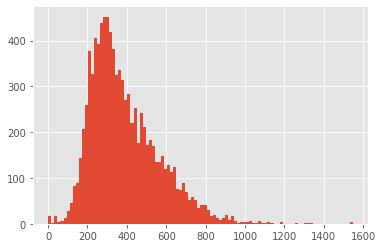

In [19]:
plt.hist(df['word_count'], bins=100);

In [25]:
df[df['word_count'] < 10].head()

,week,standing,artist,title,lyrics,character_count,word_count
2236,2014-05-10,24.0,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2357,2014-02-08,50.0,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2489,2013-11-09,87.0,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
4172,2009-05-16,26.0,Jesse McCartney Featuring Ludacris,How Do You Sleep?,Once again there's some what's in the pen,41,8
4229,2009-05-16,83.0,Demi Lovato,Don't Forget,Did you forget,14,3


In [ ]:
# SOME SONGS DON'T HAVE THE FULL LYRICS

In [26]:
# REMOVE DUPLICATE SONGS

In [27]:
df.tail()

,week,standing,artist,title,lyrics,character_count,word_count
9389,1995-09-02,74.0,Deep Blue Something,Breakfast At Tiffany's,You'll say we've got nothing in common No com...,1484,297
9390,1995-09-02,76.0,The Dove Shack,"Summertime In The LBC (From ""The Show"")",Featuring Arnita Porter Of YN-Vee) (C Knight) ...,1642,336
9391,1995-09-02,77.0,Elastica,Stutter,"No need to whine, boy, Like a wind-up toy you...",1353,276
9392,1995-09-02,79.0,Matthew Sweet,Sick Of Myself,You don't know how you move me Deconstruct me...,1105,214
9393,1995-09-02,80.0,Max-A-Million,Take Your Time (Do It Right),"Baby, take your time Let's do it Come on, baby...",1114,256
